In [1]:
####################################### OBSERVABLE TREND ANALYSIS BASED ON THE DATA ##########################################
# 1. Urban city type has highest rides & drivers than other city types and the average fare for this city type seems to be below ~$30.
# 2. Rural city type has the least number of drivers and rides and the average fare ranges from ~$25 to $45.
# 3. There is more opportunity for growth in Rural & Suburban cities for drivers.



In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# File to Load 
city_data_load = "city_data.csv"
ride_data_load = "ride_data.csv"

# Read the Ride & City Data
city_data_df = pd.read_csv(city_data_load)
ride_data_df = pd.read_csv(ride_data_load)

# Convert city data & ride data into a dataframe # Display city data & ride data
ride_data_df = pd.DataFrame(ride_data_df, columns=["city", "date", "fare", "ride_id"])
#ride_data_df.head()

city_data_df = pd.DataFrame(city_data_df, columns=["city", "driver_count", "type"])
#city_data_df.head()

In [3]:
# Combine the data into a single dataset using merge two dataframes using left join 
pyber_data = pd.merge(ride_data_df,city_data_df,how="left",on="city")

# Display the data table for preview
pyber_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
pyber_data_grouped = pyber_data.groupby("city")
#pyber_data_grouped.count().head()

In [5]:
#•	Average Fare ($) Per City
AverageFare = pyber_data_grouped["fare"].mean()

#•	Total Number of Rides Per City
TotalRides = pyber_data_grouped["ride_id"].count()

#•	Total Number of Drivers Per City
drivercount = pyber_data_grouped["driver_count"].sum()
TotalDriver = (drivercount // TotalRides)

df = pd.DataFrame({"AverageFare": AverageFare,
                   "TotalRides": TotalRides,
                   "TotalDrivers": TotalDriver})

df["AverageFare"] = df["AverageFare"].round(2)
df.head()

,AverageFare,TotalRides,TotalDrivers
city,,,
Amandaburgh,24.64,18,12
Barajasview,25.33,22,26
Barronchester,36.42,16,11
Bethanyland,32.96,18,22
Bradshawfurt,40.06,10,7


In [6]:
# Build four key variables for a Bubble Plot 
Urban = pyber_data.loc[pyber_data["type"] == "Urban", :]
Suburban = pyber_data.loc[pyber_data["type"] == "Suburban", :]
Rural = pyber_data.loc[pyber_data["type"] == "Rural"]

#•	City Type (Urban, Suburban, Rural) As final considerations:
Types = city_data_df.groupby("type")

# Group by city name
Urban_grouped = Urban.groupby("city")
Suburban_grouped  = Suburban.groupby("city")
Rural_grouped  = Rural.groupby("city")


# Urban Data Aggregation

UrbanFare = Urban_grouped["fare"].mean()
UrbanRides = Urban_grouped["ride_id"].count()
Urbancount = Urban_grouped["driver_count"].sum()
UrbanDriver = (Urbancount // UrbanRides)

# Suburban Data Aggregation

SuburbanFare = Suburban_grouped ["fare"].mean()
SuburbanRides = Suburban_grouped["ride_id"].count()
Suburbancount = Suburban_grouped["driver_count"].sum()
SuburbanDriver = (Suburbancount // SuburbanRides)

# Rural Data Aggregation

RuralFare = Rural_grouped["fare"].mean()
RuralRides = Rural_grouped["ride_id"].count()
Ruralcount = Rural_grouped["driver_count"].sum()
RuralDriver = (Ruralcount // RuralRides)

In [7]:
# Create data frames by city types for bubble plot to show the relationship between them
Urban_df = pd.DataFrame({"AverageFare": UrbanFare,
                       "TotalRides": UrbanRides,
                       "TotalDrivers": UrbanDriver})
Urban_df["AverageFare"] = Urban_df["AverageFare"].round(2)
#Urban_df.head()

Suburban_df = pd.DataFrame({"AverageFare": SuburbanFare,
                     "TotalRides": SuburbanRides,
                     "TotalDrivers": SuburbanDriver})
Suburban_df["AverageFare"] = Suburban_df["AverageFare"].round(2)
#Suburban_df.head()

Rural_df = pd.DataFrame({"AverageFare": RuralFare,
                       "TotalRides": RuralRides,
                       "TotalDrivers": RuralDriver})
Rural_df["AverageFare"] = Rural_df["AverageFare"].round(2)
#Rural_df.head()

## Bubble Plot of Ride Sharing Data

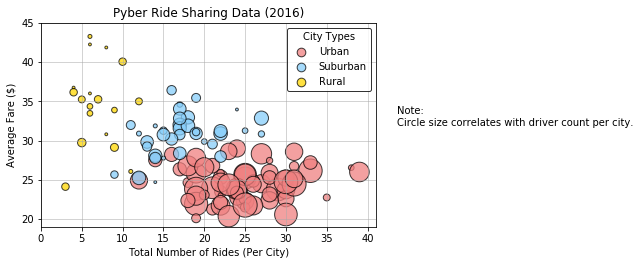

In [8]:
# Set Bubble size
MarkerSize = 8 
plt.figure(figsize=(6,3.75))

# Bubble Plot by Type
Urban_bubble = plt.scatter(Urban_df.TotalRides, Urban_df.AverageFare,facecolors="lightcoral", label = "Urban", 
                    s=(Urban_df.TotalDrivers* MarkerSize), alpha = 0.75, edgecolor = "black", linewidths = 1)

Suburban_bubble = plt.scatter(Suburban_df.TotalRides, Suburban_df.AverageFare, facecolors="lightskyblue", label = "Suburban", 
                    s=(Suburban_df.TotalDrivers* MarkerSize), alpha = 0.75, edgecolor = "black", linewidths = 1)

Rural_bubble = plt.scatter(Rural_df.TotalRides, Rural_df.AverageFare, facecolors="gold", label = "Rural", 
                    s=(Rural_df.TotalDrivers* MarkerSize),alpha = 0.75, edgecolor = "black",linewidths = 1)


# Create a scatter plot title, legend title, x axis label, and y axis label for the bubble chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Adding grid
plt.grid(True)

# The fig text right center alignment away from the figure and the size of the text in two lines.
plt.figtext(0.95, 0.5, "Note: \nCircle size correlates with driver count per city.", fontsize=10)

# Customize the grid properties
plt.grid(linestyle='-', linewidth='0.5', color='darkgrey')

### To display "outliers", comment xlim & ylim below
# The x limits of our scatter plot is 0 to 41
plt.xlim(0,41)

# The y limits of our scatter plot is 19 to 45
plt.ylim(19,45)

lgnd = plt.legend(frameon = True, edgecolor = 'black',title = 'City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

# Save Figure without losing the fig text using bbox_inches
plt.savefig("Ride_Sharing_Data.png", bbox_inches='tight')

# Show plot
plt.show()

## Total Fares by City Type

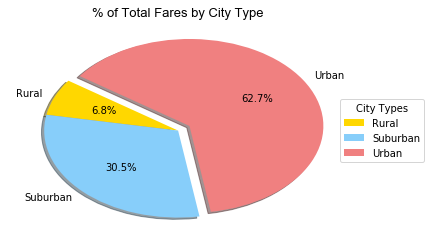

In [9]:
#---------------------------------------------------
# Pie Chart 1: •	 % of Total Fares by City Type
#---------------------------------------------------

# Create a new dataframe for fare by city type
fareByCity_df = pd.DataFrame(pyber_data.groupby(by='type')['fare'].sum())

# Create labels, wedges, colors, explode
city_type = ['Rural', 'Suburban', 'Urban']
fares_wedges =  [fareByCity_df['fare'][0]/fareByCity_df['fare'].sum(),\
                 fareByCity_df['fare'][1]/fareByCity_df['fare'].sum(),\
                 fareByCity_df['fare'][2]/fareByCity_df['fare'].sum()]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0.1)

# Calculate Type Percents & Build Pie chart 

plt.pie(fares_wedges, labels=city_type, autopct='%1.1f%%', startangle=145,\
        colors=colors, explode=explode, shadow=True)
plt.axis('off')
plt.legend(title="City Types", bbox_to_anchor=(1.25,0.5),loc="right")

plt.title("% of Total Fares by City Type",{'fontname':'Arial','fontsize':13})

# Save Figure
plt.savefig("% of Total Fares by City Type.png", bbox_inches='tight')

# Display Pie Chart #1: 
plt.show()

## Total Rides by City Type

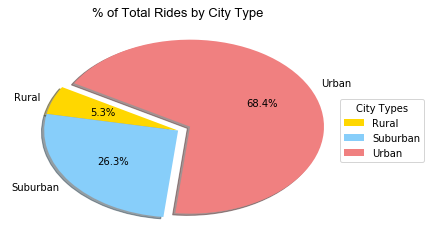

In [10]:
#---------------------------------------------------
# Pie Chart 2: •	 % of Total Rides by City Type
#---------------------------------------------------
# Create a new dataframe for ride by city type
ridesByCity_df = pd.DataFrame(pyber_data.groupby(by='type')['ride_id'].count())

# Create labels, wedges, colors, explode
city_type = ['Rural', 'Suburban', 'Urban']
rides_wedges = [ridesByCity_df['ride_id']['Rural']/ridesByCity_df['ride_id'].sum(),\
                ridesByCity_df['ride_id']['Suburban']/ridesByCity_df['ride_id'].sum(),\
                ridesByCity_df['ride_id']['Urban']/ridesByCity_df['ride_id'].sum()]

explode = (0, 0, 0.1)


# Calculate Ride Percents &  Build Pie Chart
plt.pie(rides_wedges, labels=city_type, autopct='%1.1f%%',\
        startangle=150, colors=colors, explode=explode, shadow=True)

plt.axis('off')

plt.title("% of Total Rides by City Type",{'fontname':'Arial','fontsize':13})

plt.legend(title="City Types", bbox_to_anchor=(1.25,0.5),loc="right")

# Save Figure
plt.savefig("% of Total Rides by City Type.png", bbox_inches='tight')

# Display Pie Chart #2: 
plt.show()

## Total Drivers by City Type

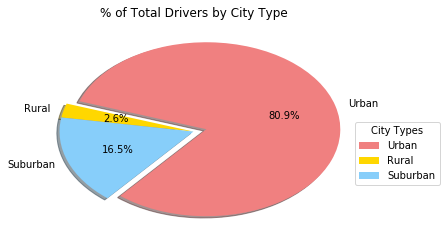

In [11]:
#-----------------------------------------------------
# Pie Chart 3: •	 % of Total Drivers by City Type
#-----------------------------------------------------
# Create a new dataframe for Total drivers by city type

final_total_drivers = city_data_df["driver_count"].sum()
urban_drivers = city_data_df.loc[city_data_df["type"] == "Urban", "driver_count"].sum()/final_total_drivers
rural_drivers = city_data_df.loc[city_data_df["type"] == "Rural", "driver_count"].sum()/final_total_drivers
suburban_drivers = city_data_df.loc[city_data_df["type"] == "Suburban", "driver_count"].sum()/final_total_drivers

# Create labels, wedges, colors, explode
city_type = 'Urban', 'Rural', 'Suburban'
drivers_wedges = [urban_drivers, rural_drivers, suburban_drivers]
explode = (0.1, 0, 0)  


# Calculate Driver Percents &  Build Pie Chart
plt.pie(drivers_wedges, labels=city_type,explode=explode,  autopct='%1.1f%%',
        shadow=True, startangle=230, colors = ["lightcoral", "gold", "lightskyblue"])
plt.axis('off')
plt.legend(title="City Types", bbox_to_anchor=(1.25,0.40),loc="right")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("% of Total Drivers by City Type.png", bbox_inches='tight')

# Display Pie Chart #3: 
plt.show()